In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
housestat = pd.read_csv('train.csv')

In [15]:
# variable to work with
numeric_data = pd.DataFrame(housestat[["LotArea", "GrLivArea", "TotalBsmtSF", "GarageArea", "SalePrice"]])
print(numeric_data.head())

   LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
0     8450       1710          856         548     208500
1     9600       1262         1262         460     181500
2    11250       1786          920         608     223500
3     9550       1717          756         642     140000
4    14260       2198         1145         836     250000


<AxesSubplot:>

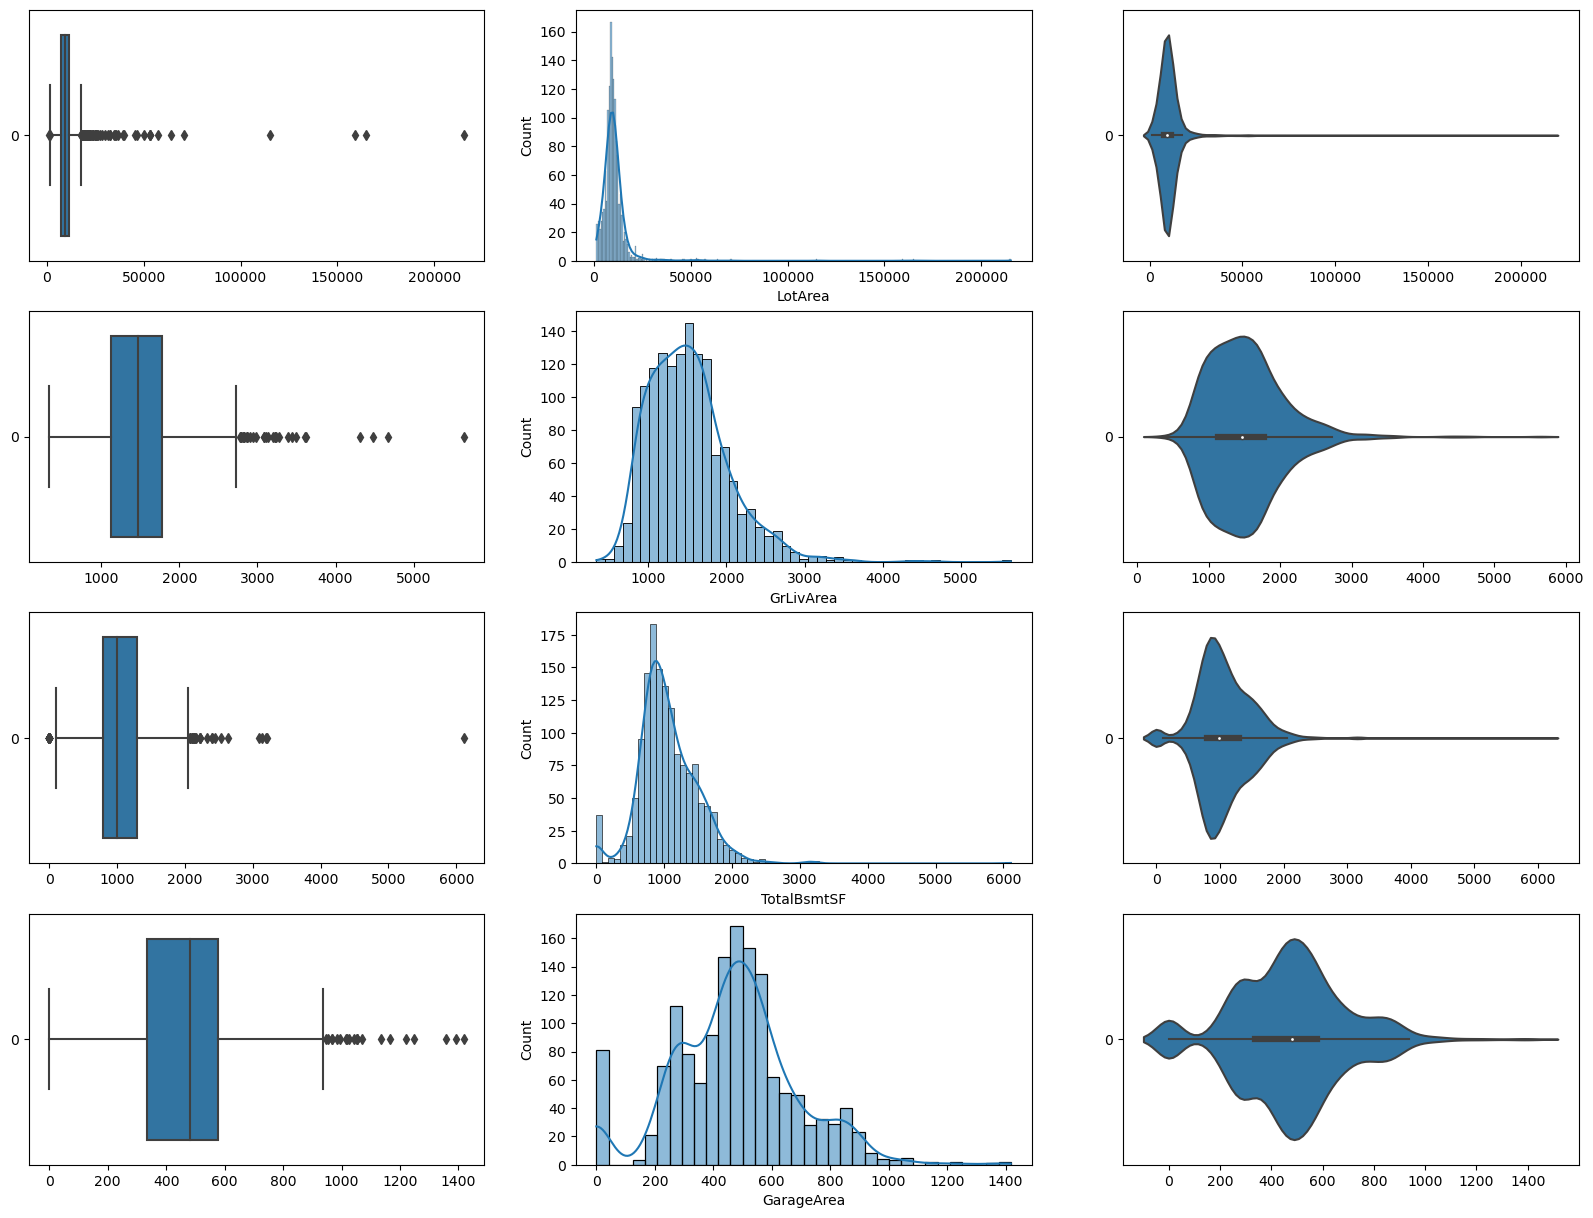

In [43]:
f, axes = plt.subplots(4,3, figsize = (20,15))

# Lot area
sb.boxplot(data = numeric_data["LotArea"], orient = "h", ax = axes[0,0])
sb.histplot(data = numeric_data["LotArea"], kde = True, ax = axes[0,1])
sb.violinplot(data = numeric_data["LotArea"], orient = "h", ax = axes[0,2])

#GrLivArea
sb.boxplot(data = numeric_data["GrLivArea"], orient = "h", ax = axes[1,0])
sb.histplot(data = numeric_data["GrLivArea"], kde = True, ax = axes[1,1])
sb.violinplot(data = numeric_data["GrLivArea"], orient = "h", ax = axes[1,2])

#TotalBsmtSF
sb.boxplot(data = numeric_data["TotalBsmtSF"], orient = "h", ax = axes[2,0])
sb.histplot(data = numeric_data["TotalBsmtSF"], kde = True, ax = axes[2,1])
sb.violinplot(data = numeric_data["TotalBsmtSF"], orient = "h", ax = axes[2,2])

#GrLivArea
sb.boxplot(data = numeric_data["GarageArea"], orient = "h", ax = axes[3,0])
sb.histplot(data = numeric_data["GarageArea"], kde = True, ax = axes[3,1])
sb.violinplot(data = numeric_data["GarageArea"], orient = "h", ax = axes[3,2])


In [38]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
print("The number of outliers are:")
((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

The number of outliers are:


LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
SalePrice      61
dtype: int64

a) LotArea has most number of outliers, with a total of 69.

In [39]:
print(numeric_data.skew())

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64


b) LotArea is most skewed, it is positively skewed

<AxesSubplot:>

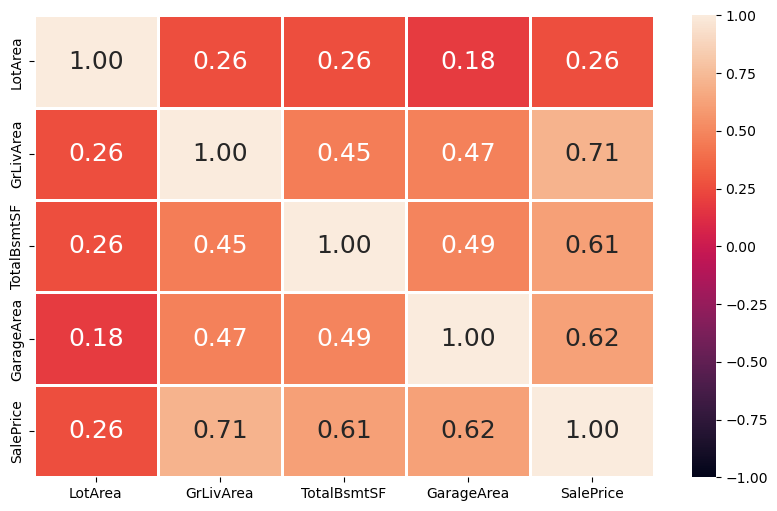

In [59]:
f = plt.figure(figsize = (10,6))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size" : 18})

c) The 2 variables are GrLivArea and GarageArea, since their correlation coefficient is closest to 1 compared to the other values

In [82]:
prob2 = pd.DataFrame(housestat[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual', 'SalePrice']])

Number of MSSubClass : 15
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

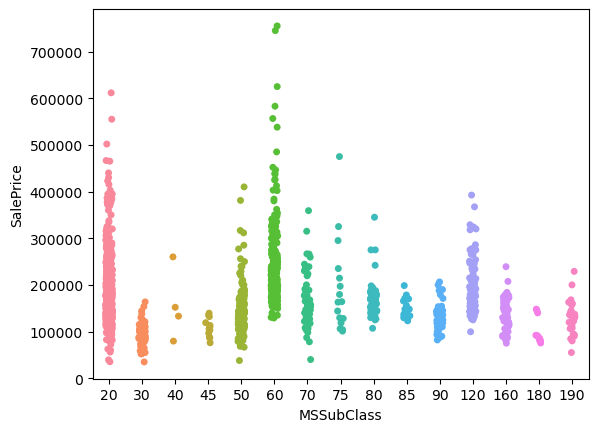

In [93]:
# MSSubClass in the Dataset -> Type of dwelling

print("Number of MSSubClass :", len(prob2["MSSubClass"].unique()))

print(prob2["MSSubClass"].value_counts())
# sb.catplot(y = "MSSubClass", data = prob2, kind = "count")
sb.stripplot(x="MSSubClass", y="SalePrice", data=prob2)

Number of Neighborhood : 25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

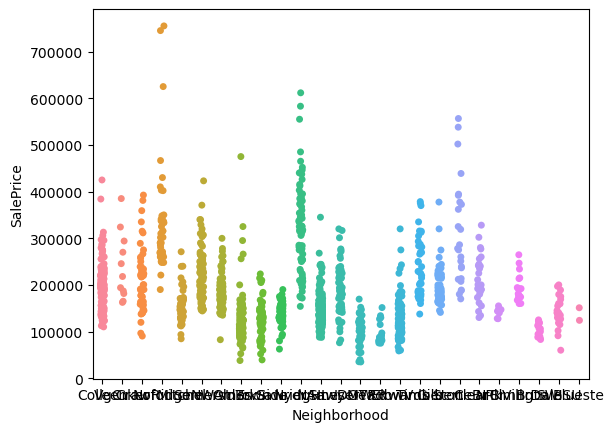

In [91]:
# Neighbourhood in the Dataset

print("Number of Neighborhood :", len(prob2["Neighborhood"].unique()))

print(prob2["Neighborhood"].value_counts())
#sb.catplot(y = "Neighborhood", data = prob2, kind = "count")
sb.stripplot(x="Neighbourhood", y="SalePrice", data=prob2)

Number of BldgType : 5
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

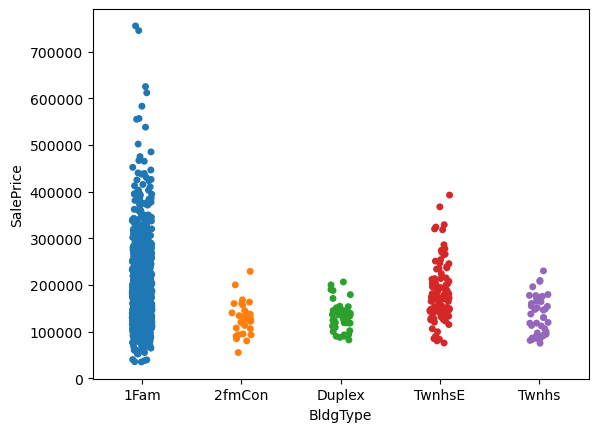

In [87]:
# BldgType in the Dataset

print("Number of BldgType :", len(prob2["BldgType"].unique()))

print(prob2["BldgType"].value_counts())
sb.stripplot(x="BldgType", y="SalePrice", data=prob2)

Number of OverallQual : 10
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

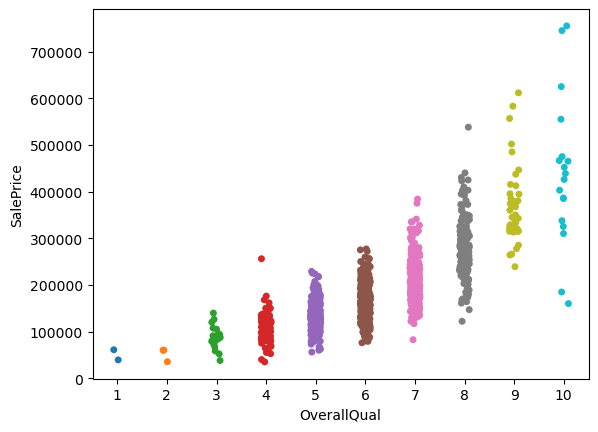

In [89]:
# BldgType in the Dataset

print("Number of OverallQual :", len(prob2["OverallQual"].unique()))

print(prob2["OverallQual"].value_counts())
sb.stripplot(x="OverallQual", y="SalePrice", data=prob2)

a) Neighbourhood has the most levels.

b) 1Fam in BldgType has the most houses, at 1220.

In [114]:
prob3 = pd.DataFrame(housestat[["YearRemodAdd", "SalePrice"]])

#missing data?
prob3.isnull().sum()

YearRemodAdd    0
SalePrice       0
dtype: int64

Remod Year : 61
1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1977     25
1997     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1959     18
1971     18
1992     17
1968     17
1978     16
1966     15
1958     15
1990     15
1969     14
1954     14
1991     14
1962     14
1963     13
1960     12
1980     12
1967     12
1973     11
1989     11
1964     11
1953     10
1979     10
1987     10
1956     10
1975     10
1955      9
1957      9
1985      9
1988      9
1981      8
1961      8
1984      7
1982      7
1974      7
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, dtype: int64


<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

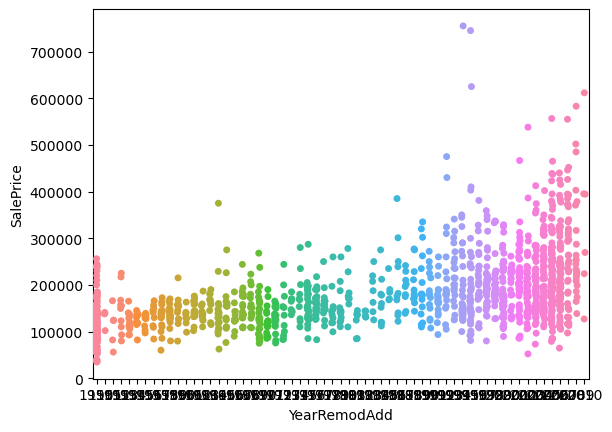

In [111]:
# BldgType in the Dataset

print("Remod Year :", len(prob3["YearRemodAdd"].unique()))
pd.set_option("display.max_rows", None)
print(prob3["YearRemodAdd"].value_counts())

sb.stripplot(x="YearRemodAdd", y="SalePrice", data=prob3)